In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def repeated_k_fold(model, X, y, n_splits=5, n_repeats=10):
    """Führt repeated k-fold cross-validation durch und berechnet die Metriken."""
    # Repeated Stratified K-Fold
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

    # Metriken definieren
    accuracy_train = []
    accuracy_test = []
    f1 = []
    roc_auc = []

    for train_index, test_index in rkf.split(X, y):
        # Splitte die Daten in Trainings- und Testdaten
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Trainiere das Modell
        model.fit(X_train, y_train)

        # Vorhersagen für Trainings- und Testdaten
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Berechne die Metriken
        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
        roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    # Durchschnittswerte berechnen
    return {
        "Train Accuracy": np.mean(accuracy_train),
        "Test Accuracy": np.mean(accuracy_test),
        "F1-Score": np.mean(f1),
        "ROC-AUC": np.mean(roc_auc),
    }


# Pfad zur Datei
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\ml_algorithmus_finden.xlsx"

# Excel-Datei einlesen
try:
    # Direkt die Datei einlesen (erstes Tabellenblatt standardmäßig)
    df = pd.read_excel(file_path)

    # Zielvariable (y) und Features (X) extrahieren
    y = df['Verletzungsstatus']
    X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

    # Skalierung der Features (X) mit StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Normiert X auf den Standardbereich (Mittelwert = 0, Std = 1)

    # Modelle definieren
    models = {
    "Extra Trees": ExtraTreesClassifier(
        bootstrap=True, 
        criterion="entropy", 
        max_depth=None, 
        max_features=0.3, 
        min_samples_leaf=1, 
        min_samples_split=5, 
        n_estimators=100,
        random_state=42
     ),}




    # Ergebnisse speichern
    results = []

    # Validierung jedes Modells
    for model_name, model in models.items():
        print(f"Modell wird validiert: {model_name}")
        metrics = repeated_k_fold(model, X_scaled, y)  # Verwende X_scaled statt X
        results.append({"Model": model_name, **metrics})

    # Ergebnisse in DataFrame konvertieren und sortieren
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

    # Ergebnisse anzeigen
    print("\nErgebnisse der Modelle:")
    print(results_df)

except FileNotFoundError:
    print("Die Datei wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")


Modell wird validiert: Extra Trees

Ergebnisse der Modelle:
         Model  Train Accuracy  Test Accuracy  F1-Score   ROC-AUC
0  Extra Trees             1.0       0.818297  0.840474  0.885493


In [15]:
import os
import joblib
# Speicherpfad für das Modell
save_path = r"K:\Team\Böhmer_Michael\TSA\ML\pipelines"
model_filename = "extra_trees_model.joblib"
full_path = os.path.join(save_path, model_filename)

# Bestes Modell auswählen
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

# Bestes Modell speichern
#if not os.path.exists(save_path):
    #os.makedirs(save_path)  # Erstelle den Ordner, falls er nicht existiert

joblib.dump(best_model, full_path)
print(f"Das beste Modell '{best_model_name}' wurde erfolgreich unter {full_path} gespeichert.")


Das beste Modell 'Extra Trees' wurde erfolgreich unter K:\Team\Böhmer_Michael\TSA\ML\pipelines\extra_trees_model.joblib gespeichert.


Feature Importance (durchschnittlich über alle Folds):
Feature ISO_Seitenunterschied Extension relativ: 0.1080
Feature ISO_Seitenunterschied Extension absolut: 0.0813
Feature ISO_Max Extension links: 0.0267
Feature CMJ_rechts_Relative Peak Landing Force-Mittelwert [BW]: 0.0231
Feature ISO_Max Extension rechts: 0.0180
Feature CMJ_KAI con: 0.0178
Feature ISO_Unterschied Extension Flexion links: 0.0162
Feature CMJ_Countermovement depth: 0.0147
Feature CMJ_links_Relative Peak Loading Force-Mittelwert [BW]: 0.0134
Feature CMJ_links_Relative Peak Landing Force-Mittelwert [BW]: 0.0132
Feature CMJ_links_Peak Loading Force-Mittelwert [N]: 0.0120
Feature CMJ_rechts_Bremsimpuls-Mittelwert [N*s]: 0.0120
Feature CMJ_links_Jump Height by Net Impulse-Mittelwert [cm]: 0.0114
Feature CMJ_rechts_Time to Stabilization-Mittelwert [s]: 0.0113
Feature CMJ_Jump Height flighttime: 0.0111
Feature CMJ_Rel. Peak Power left: 0.0110
Feature CMJ_links_Relative Peak Power-Mittelwert [Watt/kg]: 0.0107
Feature CMJ_lin

C:\Users\boehmer\AppData\Local\Temp\ipykernel_2084\920723030.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_importances[indices], y=X.columns[indices], orient='h', palette='viridis', width=0.8, hue = None)


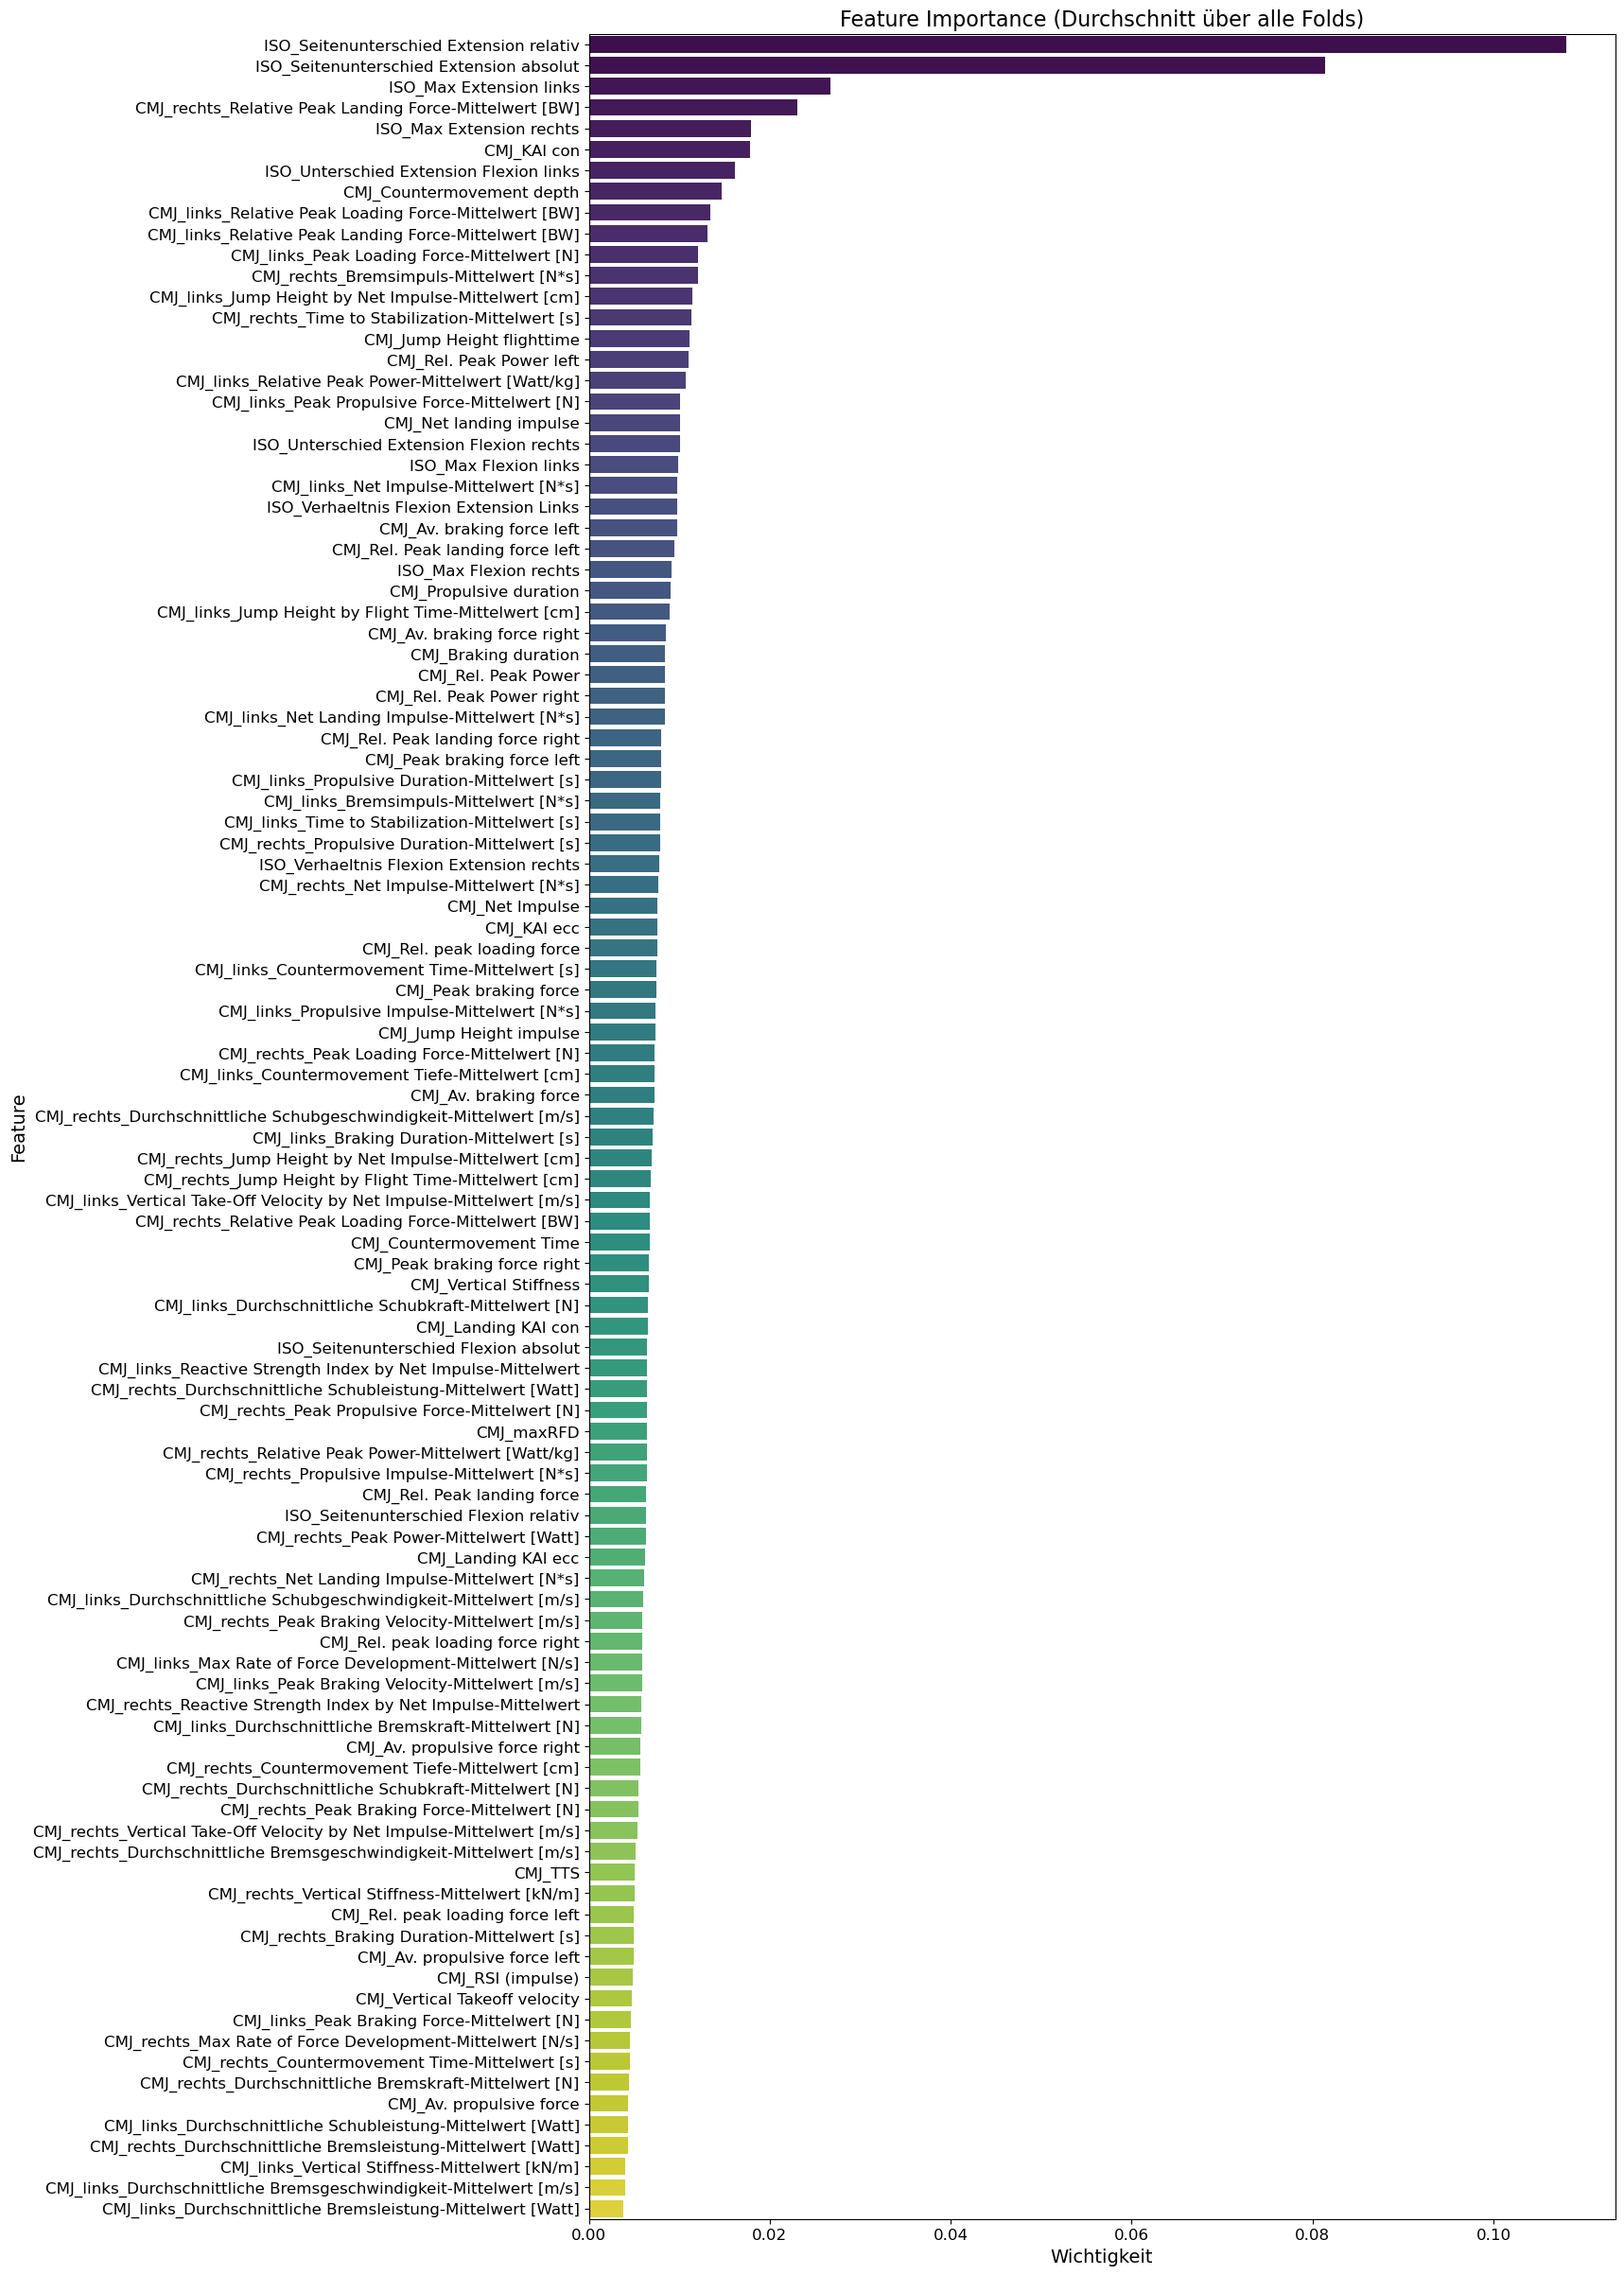

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Pfad zur Datei
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\ml_algorithmus_finden.xlsx"

# Excel-Datei einlesen
df = pd.read_excel(file_path)

# Zielvariable (y) und Features (X) extrahieren
y = df['Verletzungsstatus']
X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

# Skalierung der Features (X) mit StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normiert X auf den Standardbereich (Mittelwert = 0, Std = 1)

# Repeated Stratified K-Fold Cross-Validation
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Feature Importance speichern
feature_importances_list = []

# K-Fold Cross-Validation durchführen
for train_index, test_index in rkf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Modell mit den spezifischen Hyperparametern initialisieren und trainieren
    model = ExtraTreesClassifier(
        bootstrap=True, 
        criterion="entropy", 
        max_depth=None, 
        max_features=0.3, 
        min_samples_leaf=1, 
        min_samples_split=5, 
        n_estimators=100,
        random_state=42
    )
    
    model.fit(X_train, y_train)

    # Feature Importance für den aktuellen Fold speichern
    feature_importances_list.append(model.feature_importances_)

# Durchschnitt der Feature-Importances über alle Folds berechnen
average_importances = np.mean(feature_importances_list, axis=0)

# Feature Importance mit den Feature-Namen anzeigen
indices = average_importances.argsort()[::-1]  # Absteigend sortieren
print("Feature Importance (durchschnittlich über alle Folds):")
for i in indices:
    print(f"Feature {X.columns[i]}: {average_importances[i]:.4f}")

# Visualisierung: Balkendiagramm erstellen
plt.figure(figsize=(14, 30))  # Größe des Diagramms erhöhen

# Balkenbreite und Abstand anpassen
sns.barplot(x=average_importances[indices], y=X.columns[indices], orient='h', palette='viridis', width=0.8, hue = None)

# Titel und Achsenbeschriftungen anpassen
plt.title('Feature Importance (Durchschnitt über alle Folds)', fontsize=16)
plt.xlabel('Wichtigkeit', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Schriftgröße der Achsenbeschriftungen anpassen
plt.xticks(fontsize=12)  # Schriftgröße für x-Achse
plt.yticks(fontsize=12)  # Schriftgröße für y-Achse

# Diagramm anzeigen
plt.show()



C:\Users\boehmer\AppData\Local\Temp\ipykernel_15280\96678852.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_importances[indices], y=X.columns[indices], orient='h', palette='viridis', width=0.8, hue = None)


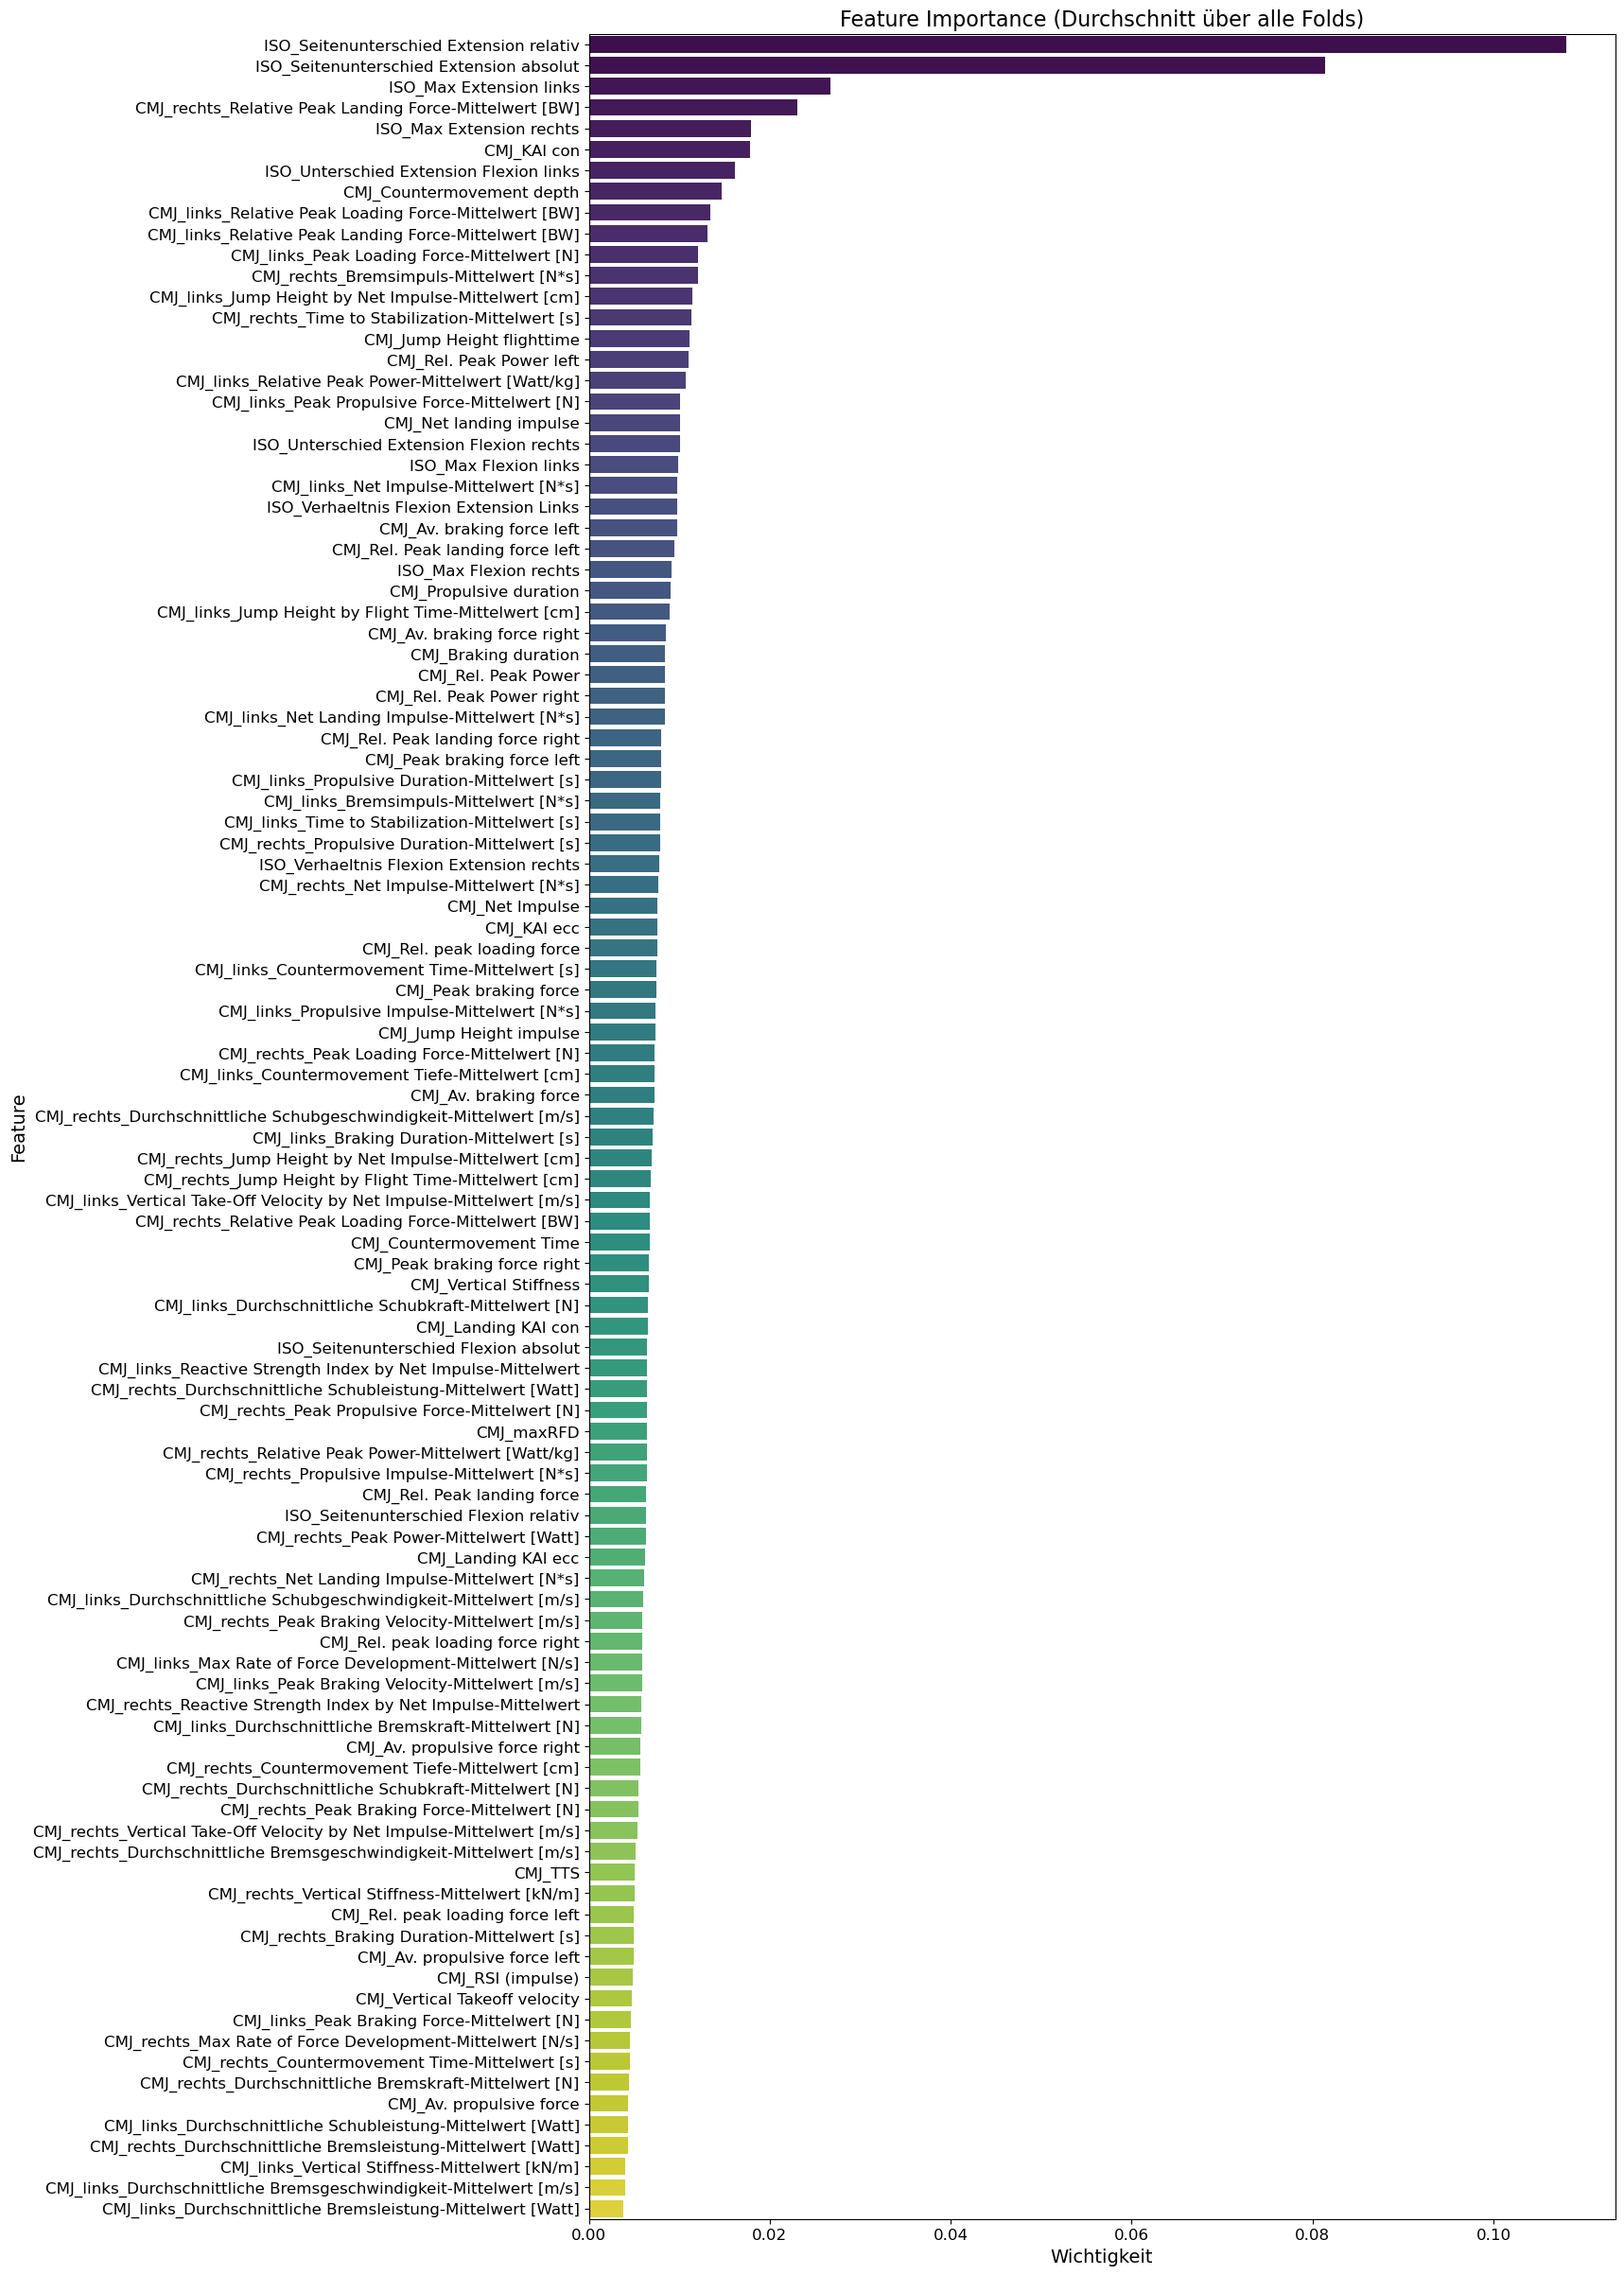

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisierung: Balkendiagramm erstellen
plt.figure(figsize=(14, 30))  # Größe des Diagramms erhöhen

# Balkenbreite und Abstand anpassen
sns.barplot(x=average_importances[indices], y=X.columns[indices], orient='h', palette='viridis', width=0.8, hue = None)

# Titel und Achsenbeschriftungen anpassen
plt.title('Feature Importance (Durchschnitt über alle Folds)', fontsize=16)
plt.xlabel('Wichtigkeit', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Schriftgröße der Achsenbeschriftungen anpassen
plt.xticks(fontsize=12)  # Schriftgröße für x-Achse
plt.yticks(fontsize=12)  # Schriftgröße für y-Achse

# Diagramm anzeigen
plt.show()


In [5]:
# Korrelationsmatrix berechnen
correlation_matrix = df.drop(columns=['Verletzungsstatus']).corr()

# Stark korrelierte Features identifizieren
threshold = 0.8  # Schwellenwert für starke Korrelation
highly_correlated_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_i = correlation_matrix.index[i]
            feature_j = correlation_matrix.index[j]
            highly_correlated_pairs.append((feature_i, feature_j, correlation_matrix.iloc[i, j]))

print("Stark korrelierte Variablen:")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} und {pair[1]} mit Korrelationskoeffizient {pair[2]:.2f}")


Stark korrelierte Variablen:
CMJ_Net Impulse und CMJ_Jump Height flighttime mit Korrelationskoeffizient 0.93
CMJ_Jump Height impulse und CMJ_Vertical Takeoff velocity mit Korrelationskoeffizient 0.88
CMJ_Rel. peak loading force left und CMJ_Rel. peak loading force mit Korrelationskoeffizient 0.87
CMJ_Rel. peak loading force right und CMJ_Rel. peak loading force mit Korrelationskoeffizient 0.88
CMJ_RSI (impulse) und CMJ_Net Impulse mit Korrelationskoeffizient 0.81
CMJ_Rel. Peak Power und CMJ_Jump Height flighttime mit Korrelationskoeffizient 0.91
CMJ_Rel. Peak Power und CMJ_Net Impulse mit Korrelationskoeffizient 0.91
CMJ_Rel. Peak Power und CMJ_RSI (impulse) mit Korrelationskoeffizient 0.82
CMJ_Rel. Peak Power left und CMJ_Jump Height flighttime mit Korrelationskoeffizient 0.88
CMJ_Rel. Peak Power left und CMJ_Net Impulse mit Korrelationskoeffizient 0.88
CMJ_Rel. Peak Power left und CMJ_Rel. Peak Power mit Korrelationskoeffizient 0.95
CMJ_Rel. Peak Power right und CMJ_Jump Height fligh

In [17]:
# Korrelationsmatrix berechnen
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Schwellenwert für starke Korrelation
threshold = 0.7

# Paare von stark korrelierten Variablen identifizieren
to_drop = set()

for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_i = correlation_matrix.index[i]
            feature_j = correlation_matrix.index[j]

            # Vergleiche die Feature-Importances und füge das weniger wichtige Feature zu "to_drop" hinzu
            if average_importances[X.columns.get_loc(feature_i)] < average_importances[X.columns.get_loc(feature_j)]:
                to_drop.add(feature_i)
            else:
                to_drop.add(feature_j)

# Entferne die stark korrelierten Features
X_reduced = pd.DataFrame(X_scaled, columns=X.columns).drop(columns=to_drop)

# Zielvariable (y) beibehalten und den reduzierten Datensatz speichern
df_70 = pd.concat([X_reduced, y], axis=1)  # Zielvariable hinzufügen

# Speichern des reduzierten Datensatzes
save_path = r"K:\Team\Böhmer_Michael\TSA\ML\df_70.xlsx"
df_70.to_excel(save_path, index=False)

print(f"Reduzierter Datensatz gespeichert unter: {save_path}")
print(f"Entfernte Variablen: {to_drop}")


Reduzierter Datensatz gespeichert unter: K:\Team\Böhmer_Michael\TSA\ML\df_70.xlsx
Entfernte Variablen: {'CMJ_links_Relative Peak Landing Force-Mittelwert [BW]', 'CMJ_links_Durchschnittliche Schubleistung-Mittelwert [Watt]', 'CMJ_Rel. Peak Power right', 'CMJ_rechts_Durchschnittliche Bremsleistung-Mittelwert [Watt]', 'CMJ_Rel. peak loading force right', 'CMJ_Av. propulsive force left', 'CMJ_links_Net Impulse-Mittelwert [N*s]', 'CMJ_rechts_Propulsive Duration-Mittelwert [s]', 'CMJ_links_Reactive Strength Index by Net Impulse-Mittelwert', 'CMJ_links_Durchschnittliche Bremsleistung-Mittelwert [Watt]', 'CMJ_rechts_Net Landing Impulse-Mittelwert [N*s]', 'CMJ_rechts_Peak Propulsive Force-Mittelwert [N]', 'CMJ_links_Jump Height by Flight Time-Mittelwert [cm]', 'CMJ_rechts_Countermovement Tiefe-Mittelwert [cm]', 'CMJ_Jump Height flighttime', 'CMJ_rechts_Max Rate of Force Development-Mittelwert [N/s]', 'CMJ_Countermovement Time', 'CMJ_rechts_Reactive Strength Index by Net Impulse-Mittelwert', 'CM

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dateipfade für die Tabellen
tabelle_70 = r"K:\Team\Böhmer_Michael\TSA\ML\df_70.xlsx"
tabelle_80 = r"K:\Team\Böhmer_Michael\TSA\ML\df_80.xlsx"
tabelle_90 = r"K:\Team\Böhmer_Michael\TSA\ML\df_90.xlsx"

# Pfad zum Speichern der Korrelationsmatrizen
output_path = r"K:\Team\Böhmer_Michael\TSA\ML\grafik"

# Funktion zum Erstellen und Speichern der Korrelationsmatrix
def create_and_save_correlation_matrix(file_path, output_path, filename):
    # Daten einlesen
    df = pd.read_excel(file_path)
    
    # Berechnen der Korrelationsmatrix
    correlation_matrix = df.corr()
    
    # Plotten der Korrelationsmatrix
    plt.figure(figsize=(80, 80))  # Anpassen der Größe des Plots
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
    
    # Speichern der Grafik als SVG
    output_file = f"{output_path}/{filename}.svg"
    plt.savefig(output_file, format="svg")
    plt.close()

# Korrelationsmatrizen für alle Tabellen erstellen und speichern
create_and_save_correlation_matrix(tabelle_70, output_path, "korrelationsmatrix_70")
create_and_save_correlation_matrix(tabelle_80, output_path, "korrelationsmatrix_80")
create_and_save_correlation_matrix(tabelle_90, output_path, "korrelationsmatrix_90")

"Korrelationsmatrizen wurden erfolgreich erstellt und gespeichert."


'Korrelationsmatrizen wurden erfolgreich erstellt und gespeichert.'

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def repeated_k_fold(model, X, y, n_splits=5, n_repeats=10):
    """Führt repeated k-fold cross-validation durch und berechnet die Metriken."""
    # Repeated Stratified K-Fold
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

    # Metriken definieren
    accuracy_train = []
    accuracy_test = []
    f1 = []
    roc_auc = []

    for train_index, test_index in rkf.split(X, y):
        # Splitte die Daten in Trainings- und Testdaten
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Trainiere das Modell
        model.fit(X_train, y_train)

        # Vorhersagen für Trainings- und Testdaten
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Berechne die Metriken
        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
        roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    # Durchschnittswerte berechnen
    return {
        "Train Accuracy": np.mean(accuracy_train),
        "Test Accuracy": np.mean(accuracy_test),
        "F1-Score": np.mean(f1),
        "ROC-AUC": np.mean(roc_auc),
    }


# Pfad zur Datei
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\df_70.xlsx"

# Excel-Datei einlesen
try:
    # Direkt die Datei einlesen (erstes Tabellenblatt standardmäßig)
    df = pd.read_excel(file_path)

    # Zielvariable (y) und Features (X) extrahieren
    y = df['Verletzungsstatus']
    X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

    # Skalierung der Features (X) mit StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Normiert X auf den Standardbereich (Mittelwert = 0, Std = 1)

    # Modelle definieren
    models = {
    "Extra Trees": ExtraTreesClassifier(
        bootstrap=True, 
        criterion="entropy", 
        max_depth=None, 
        max_features=0.3, 
        min_samples_leaf=1, 
        min_samples_split=5, 
        n_estimators=100,
        random_state=42
     ),}




    # Ergebnisse speichern
    results = []

    # Validierung jedes Modells
    for model_name, model in models.items():
        print(f"Modell wird validiert: {model_name}")
        metrics = repeated_k_fold(model, X_scaled, y)  # Verwende X_scaled statt X
        results.append({"Model": model_name, **metrics})

    # Ergebnisse in DataFrame konvertieren und sortieren
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

    # Ergebnisse anzeigen
    print("\nErgebnisse der Modelle:")
    print(results_df)

except FileNotFoundError:
    print("Die Datei wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")


Modell wird validiert: Extra Trees

Ergebnisse der Modelle:
         Model  Train Accuracy  Test Accuracy  F1-Score   ROC-AUC
0  Extra Trees             1.0       0.816268   0.83507  0.902992


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def repeated_k_fold(model, X, y, n_splits=5, n_repeats=10):
    """Führt repeated k-fold cross-validation durch und berechnet die Metriken."""
    # Repeated Stratified K-Fold
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

    # Metriken definieren
    accuracy_train = []
    accuracy_test = []
    f1 = []
    roc_auc = []

    for train_index, test_index in rkf.split(X, y):
        # Splitte die Daten in Trainings- und Testdaten
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Trainiere das Modell
        model.fit(X_train, y_train)

        # Vorhersagen für Trainings- und Testdaten
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Berechne die Metriken
        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
        roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    # Durchschnittswerte berechnen
    return {
        "Train Accuracy": np.mean(accuracy_train),
        "Test Accuracy": np.mean(accuracy_test),
        "F1-Score": np.mean(f1),
        "ROC-AUC": np.mean(roc_auc),
    }


# Pfad zur Datei
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\df_80.xlsx"

# Excel-Datei einlesen
try:
    # Direkt die Datei einlesen (erstes Tabellenblatt standardmäßig)
    df = pd.read_excel(file_path)

    # Zielvariable (y) und Features (X) extrahieren
    y = df['Verletzungsstatus']
    X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

    # Skalierung der Features (X) mit StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Normiert X auf den Standardbereich (Mittelwert = 0, Std = 1)

    # Modelle definieren
    models = {
    "Extra Trees": ExtraTreesClassifier(
        bootstrap=True, 
        criterion="entropy", 
        max_depth=None, 
        max_features=0.3, 
        min_samples_leaf=1, 
        min_samples_split=5, 
        n_estimators=100,
        random_state=42
     ),}




    # Ergebnisse speichern
    results = []

    # Validierung jedes Modells
    for model_name, model in models.items():
        print(f"Modell wird validiert: {model_name}")
        metrics = repeated_k_fold(model, X_scaled, y)  # Verwende X_scaled statt X
        results.append({"Model": model_name, **metrics})

    # Ergebnisse in DataFrame konvertieren und sortieren
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

    # Ergebnisse anzeigen
    print("\nErgebnisse der Modelle:")
    print(results_df)

except FileNotFoundError:
    print("Die Datei wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")


Modell wird validiert: Extra Trees

Ergebnisse der Modelle:
         Model  Train Accuracy  Test Accuracy  F1-Score   ROC-AUC
0  Extra Trees             1.0       0.811196  0.833156  0.893366


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def repeated_k_fold(model, X, y, n_splits=5, n_repeats=10):
    """Führt repeated k-fold cross-validation durch und berechnet die Metriken."""
    # Repeated Stratified K-Fold
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

    # Metriken definieren
    accuracy_train = []
    accuracy_test = []
    f1 = []
    roc_auc = []

    for train_index, test_index in rkf.split(X, y):
        # Splitte die Daten in Trainings- und Testdaten
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Trainiere das Modell
        model.fit(X_train, y_train)

        # Vorhersagen für Trainings- und Testdaten
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Berechne die Metriken
        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
        roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    # Durchschnittswerte berechnen
    return {
        "Train Accuracy": np.mean(accuracy_train),
        "Test Accuracy": np.mean(accuracy_test),
        "F1-Score": np.mean(f1),
        "ROC-AUC": np.mean(roc_auc),
    }


# Pfad zur Datei
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\df_90.xlsx"

# Excel-Datei einlesen
try:
    # Direkt die Datei einlesen (erstes Tabellenblatt standardmäßig)
    df = pd.read_excel(file_path)

    # Zielvariable (y) und Features (X) extrahieren
    y = df['Verletzungsstatus']
    X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

    # Skalierung der Features (X) mit StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Normiert X auf den Standardbereich (Mittelwert = 0, Std = 1)

    # Modelle definieren
    models = {
    "Extra Trees": ExtraTreesClassifier(
        bootstrap=True, 
        criterion="entropy", 
        max_depth=None, 
        max_features=0.3, 
        min_samples_leaf=1, 
        min_samples_split=5, 
        n_estimators=100,
        random_state=42
     ),}




    # Ergebnisse speichern
    results = []

    # Validierung jedes Modells
    for model_name, model in models.items():
        print(f"Modell wird validiert: {model_name}")
        metrics = repeated_k_fold(model, X_scaled, y)  # Verwende X_scaled statt X
        results.append({"Model": model_name, **metrics})

    # Ergebnisse in DataFrame konvertieren und sortieren
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

    # Ergebnisse anzeigen
    print("\nErgebnisse der Modelle:")
    print(results_df)

except FileNotFoundError:
    print("Die Datei wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")


Modell wird validiert: Extra Trees

Ergebnisse der Modelle:
         Model  Train Accuracy  Test Accuracy  F1-Score   ROC-AUC
0  Extra Trees             1.0        0.81471  0.839257  0.888421
